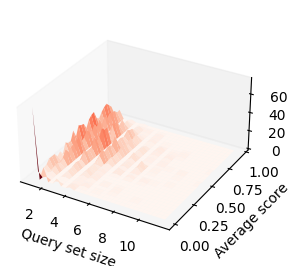

In [1]:
import numpy as np
import pandas as pd
import json
import csv

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def save_lists_to_csv(filename, data_lists):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for data_list in data_lists:
            writer.writerow(data_list)

def load_json(filename):
    with open(filename, "r", encoding='utf-8') as json_file:
        return json.load(json_file)
def flatten_list(nested_list):
    return [item for sublist in nested_list for item in sublist]    
def insert_element_at_beginning(lst, element):
    lst.insert(0, element)
    return lst

data1 = load_json('/kaggle/input/20231103-charades-sta-results/results25.json')

X1 = []
Y1 = []

for key, value  in data1.items():
    
    s = len(value['sentences'])
    score = value['pred_scores']
    
    X1.append(s)
    Y1.append(score)

# 绘制3D等高线图
# 计算点的分布密度
fig = plt.figure(figsize=(4,3.2))

heatmap, xedges, yedges = np.histogram2d(X1, Y1, bins=30)


X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = heatmap.T
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='Reds')

ax1.set_xlabel("Query set size")
ax1.set_ylabel("Average score")
ax1.set_zlabel("Density")
ax1.grid(False)
# ax1.set_xlim(0,8)
ax1.set_xticks([2,4,6,8, 10])
# fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax1.set_box_aspect([1, 1, 0.5])
# plt.tight_layout()
plt.savefig('sta_score_v.pdf', format='pdf',dpi=300)
# 显示图形
plt.show()